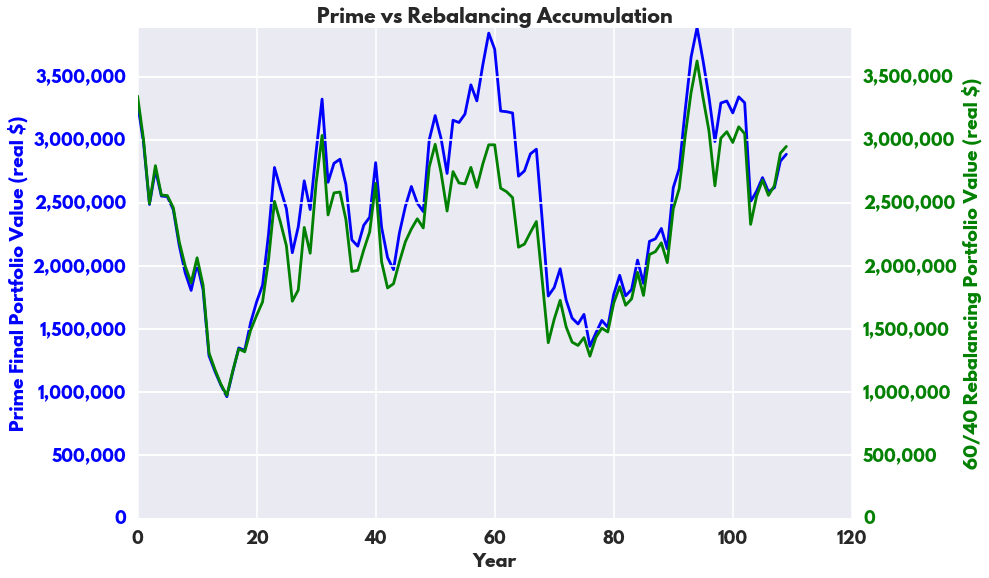

In [2]:
%matplotlib inline
from decimal import Decimal
import market
import harvesting
import withdrawal
import accumulation
import simulate
import plot

rebalancing_r = []
prime_r = []

for year in range(1871, 2016 - 35):
    x = simulate.simulate_accumulation(market.Returns_US_1871().iter_from(year), accumulation=accumulation.N_60_RebalanceAccumulation)
    rebalancing_r.append(x[-1].portfolio_r)
    
    x = simulate.simulate_accumulation(market.Returns_US_1871().iter_from(year), accumulation=accumulation.PrimeAccumulation)
    prime_r.append(x[-1].portfolio_r)

plot.plot_two(prime_r, rebalancing_r, s1_title='Prime Final Portfolio Value (real $)', s2_title='60/40 Rebalancing Portfolio Value (real $)', x_label='Year', title='Prime vs Rebalancing Accumulation', y_lim=(int(min(0, min(prime_r + rebalancing_r))), int(max(prime_r + rebalancing_r))))

In [3]:
for year, (p, r) in enumerate(zip(prime_r, rebalancing_r), 1871):
    if p < r:
        print('Year {} prime underperformed: {:.2}%'.format(year, 100 - p * 100 / r))

Year 1871 prime underperformed: 1.7%
Year 1872 prime underperformed: 0.82%
Year 1873 prime underperformed: 0.26%
Year 1874 prime underperformed: 1.2%
Year 1875 prime underperformed: 0.29%
Year 1876 prime underperformed: 0.32%
Year 1877 prime underperformed: 0.63%
Year 1878 prime underperformed: 1.3%
Year 1879 prime underperformed: 2.6%
Year 1880 prime underperformed: 3.2%
Year 1881 prime underperformed: 2.5%
Year 1882 prime underperformed: 1.9%
Year 1883 prime underperformed: 1.7%
Year 1884 prime underperformed: 1.2%
Year 1885 prime underperformed: 0.70%
Year 1886 prime underperformed: 1.1%
Year 1887 prime underperformed: 0.64%
Year 1978 prime underperformed: 0.62%
Year 1979 prime underperformed: 2.2%
Year 1980 prime underperformed: 2.1%


In [4]:
total = 1
for p, r in zip(prime_r, rebalancing_r):
    total *= p - r
print('Prime vs Rebalancing geomean: ${}'.format(total ** (Decimal('1.0') / len(prime_r))))

Prime vs Rebalancing geomean: $132530.7885083580367944096693
